# Model Evaluation

## Regression Metrics

Let's first get some predictions so that we can evaluate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Boston House Prices dataset
cali = fetch_california_housing()
X, y = cali.data, cali.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In regression, we essentially care about how **close** our predictions are to the actual values.

In [2]:
print(f'Actual: {y_test[:5]}')
print(f'Preds:  {y_pred[:5]}')

Actual: [0.477   0.458   5.00001 2.186   2.78   ]
Preds:  [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


We can visualize this by creating a scatterplot and on one axis place the actual values and on the other the predicted ones.

If we had an oracle that made perfect predictions, they would all fall in the line `y=x`. The further away from this line, the worse our predictions are.

Text(0.5, 1.0, 'Linear Regression Model Evaluation on Boston House Prices')

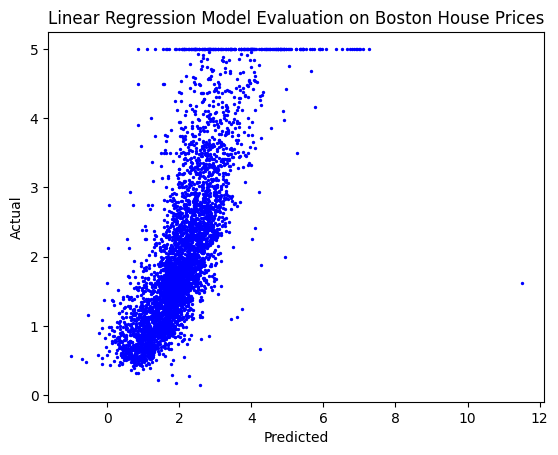

In [3]:
plt.scatter(y_pred, y_test, color='blue', s=2)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Regression Model Evaluation on Boston House Prices')

Let's zoom in on some points

Text(0, 0.5, 'Actual')

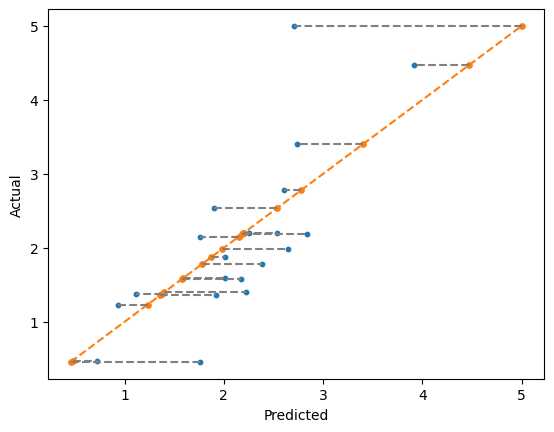

In [4]:
plt.plot([min(y_test[:20]), max(y_test[:20])], [min(y_test[:20]), max(y_test[:20])], color='C1', ls='--')

for y, p in zip(y_test[:20], y_pred[:20]):
  plt.plot([y, p], [y, y], ls='--', color='0.5')

plt.plot([min(y_test[:20]), min(y_test[:20])], [max(y_test[:20]), max(y_test[:20])])

plt.scatter(y_pred[:20], y_test[:20], s=10)
plt.scatter(y_test[:20], y_test[:20], s=15)

plt.xlabel('Predicted')
plt.ylabel('Actual')

In the figure above:
  - The blue points are the same thing we saw previously. They are our predictions
  - The orange points are how it would look like if our predictions were made by an oracle (i.e. they would all fall onto the `y=x` line)
  - The gray lines are our **errors**. This is the distance our predictions have to the oracle's. This distance is what we want to quantify with the regression error metrics!

  The different metrics simply count these distances in different ways.

  To better understand this we'll take a look at 3 of the most popular metrics.

  ### Mean Absolute Error (MAE)

  This simply takes the errors (i.e. gray lines in the figure above) and averages them.

In [5]:
print(f'MAE: {np.mean(np.abs(y_test - y_pred)):.2f}')

MAE: 0.53


### Mean Squared Error (MSE)

This takes the errors, squares them and averages them. This metric emphasizes more on bigger errors than smaller ones.

E.g. we have two classifiers A and B

| Actual | PredA | PredB |
|--------|-------|-------|
|    1   |   1   |   2   |
|    2   |   3   |   1   |

These two would have the same MAE, but the MSE would be greater for A.

In [6]:
print(f'MSE: {np.mean((y_test - y_pred) ** 2):.2f}')

MSE: 0.56


### Mean Absolute Percentage Error (MAPE)

Let's say we are predicting house prices and we have the following two predictions:

| Actual House Price (in $) | Predicted House Price (in \$) |
|---------------------------|-------------------------------|
|          10000            |             20000             |
|          200000           |             180000            |

If we were to look at either the absolute of squared error of these two instances, we'd see that the error is larger in the second case. However, most would argue that the latter is a better prediction. In the first we were 200% off, while in the second only 10% off.

To generalize this a bit, in some cases we aren't interested in the error itself, rather the **percentage of the error to the actual value**.

In [7]:
print(f'MAPE: {np.mean(np.abs(y_test - y_pred) / y_test):.2f}')

MAPE: 0.32


These aren't the only metrics and none of these are perfect. When wanting to evaluate our models we need to **select the metric that best suits our business and modelling needs**.

## Classification Metrics

### Binary Classification

When evaluating binary classifiers, we might be tempted to simply compare the correct predictions we made to the wrong ones. A popular metric that does this is called **accuracy**. By blindly using accuracy on every task, though, we might fall into a few issues:

1. Accuracy does not work in imbalanced datasets.
2. Even in a balanced dataset, accuracy is only good if we want to measure the predictive power of our classifier. In some cases we might be more interested in other things as well.

In binary classification both labels and predictions can take 2 values, 0 and 1. This means that for each sample we have possible outcomes. These 4 are called **True Positive (TP), True Negative (TN), False Positive (FP) or False Negative (FN)**.

|              | y = 1 | y = 0 |
| ------------ | ----- | ----- |
| $\hat y = 1$ |   TP  |   FP  |
| $\hat y = 0$ |   FN  |   TN  |

By simply counting the number of each of these cases we get what we call the **confusion matrix**.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load the Breast Cancer dataset
bc = load_breast_cancer()
X, y = bc.data, bc.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print(f'Actual: {y_test[:15]}')
print(f'Preds:  {y_pred[:15]}')

Actual: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1]
Preds:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1]


In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f'TP: {tp}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TN: {tn}')

TP: 70
FP: 3
FN: 1
TN: 40


These 4 numbers can be combined to give a different perspective on our classifier's performance. The two most popular confusion matrix metrics in ML are:

- **Recall**. The percentage of positive samples (i.e. $y=1$) our model predicted: $\frac{TP}{TP+FN}$
- **Precision**. The percentage of positive predictions (i.e. $\hat y = 1$) our model got right: $\frac{TP}{TP+FP}$

In [11]:
from sklearn.metrics import precision_score, recall_score, classification_report


print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')

print(classification_report(y_test, y_pred))

Precision: 0.96
Recall: 0.99
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In the end we need to select a metric that suits our business needs and properly measures our classifier's performance.

### Multi-Class Classification

In cases where we have $M$ classes (where $M>2$), we don't have just 4 possible outomes, but $M^2$ ones.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


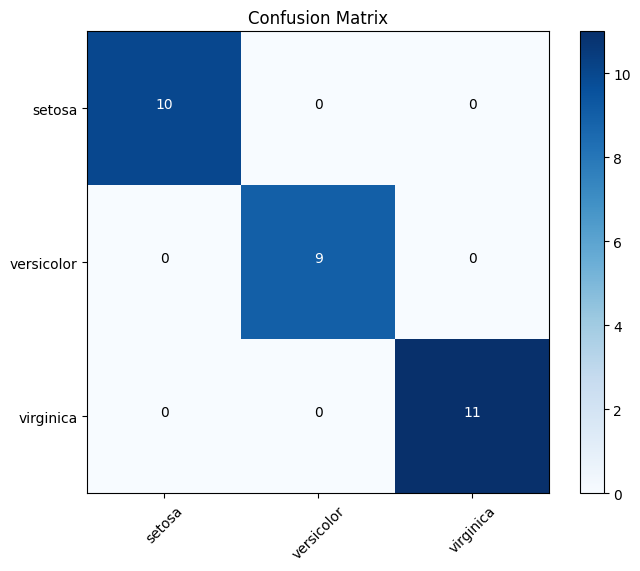

In [12]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = iris.target_names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

The idea here is that we can decompose the above into a confusion matrix for each class, i.e. a TP/FP/FN/TN value for each class.

Then we can aggregate these numbers in different ways to produce the metrics we discussed above. The two main aggregation methods are:

- **Micro averaging**: Add the TP/FP/FN/TN values from all the classes and compute the metrics
- **Macro averaging**: Compute the metric we want (e.g. precision, recall) for each class separately and take their average.


In [13]:
print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro"):.2f}\n')

print(classification_report(y_test, y_pred))

Precision: 1.00
Recall: 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Overfitting

Overfitting is a very well explored topic in the field of Machine Learning. One issue not so well known is that we can overfit on the test set as well!

If we rely only on a train/test split and use the test set both for hyperparameter tuning and model evaluation, the results on the test set won't be reliable. The reason is that it is possible, through the multiple HPT iterations, for information from the test set to bleed into the model!

For this reason we might rely on a train/validation/test set split.

- **training set**: used to train the model
- **validation set**: used for tuning the model's hyperparameters
- **test set**: used for evaluating your final model

For instance, a 60-20-20 split would look like this:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

print(f'Original data:  {X.shape}')

print(f'Train set:      {X_train.shape}')
print(f'Validation set: {X_val.shape}')
print(f'Test set:       {X_test.shape}')

Original data:  (150, 4)
Train set:      (90, 4)
Validation set: (30, 4)
Test set:       (30, 4)


### Cross-validation

Cross-validation is a technique in machine learning that involves dividing the dataset into $k$ subsets, or folds. Each fold is used as both a training and validation set in turn, with the model being trained on $k-1$ folds and evaluated on the remaining fold. This process is repeated $k$ times, with each fold serving as the validation set once. By averaging the performance metrics across all iterations, cross-validation provides a more reliable estimate of the model's performance compared to a single train-test split. It helps to reduce the dependency on a specific data split, ensures better use of data, and is commonly used for model selection and hyperparameter tuning.

In scikit we can either do this through a hyperparam search API like [`GridSearchCV`]() or directly:

In [15]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train/y_train will serve as both training and validation sets

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')  # 5-fold CV

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The idea here is that instead of simply measuing performance on a validation set and taking that for granted, now we have the performace on $k$ different validation sets.

In [16]:
scores

array([0.95816993, 0.95816993, 0.96078431, 1.        , 1.        ])

The simplest thing to do to get a single estimation is to average them and consider that the validation performance.

In [17]:
scores.mean()

0.9754248366013073

However, the difference from fold to fold is also indicative. If we see heavily fluctuating performance, this means that our model is very prone to this kind of overfitting. Alternatively, if the scores across folds are relatively consistent, we can be more confident that this performance is the acual model's performance.

One way to measure this difference is by taking the standard deviation of the scores.

In [18]:
scores.std()

0.020088232901750096

## Grid Search Model Evaluation Example

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 2, 4],
    'min_samples_split': [2, 3, 4],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro', verbose=1)

Most people would rely in grid search's selection for the best parameters.

In [20]:
# Print the best hyperparameters and corresponding score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

# Evaluate the best model on the test set
print('Test Set Score:', grid_search.best_estimator_.score(X_test, y_test))

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}
Best Score: 0.9596150062713983
Test Set Score: 0.9649122807017544


In practice this combination might not actually be what we want.

Let's thoroughly evaluate our model.

We can see the results in detail through `grid_search.cv_results_`

In [21]:
grid_search.cv_results_

{'mean_fit_time': array([0.11069937, 0.21268811, 0.37252007, 0.21577692, 0.42730041,
        0.94327574, 0.21038599, 0.44079962, 0.71879792, 0.22164693,
        0.69506273, 0.67600665, 0.19696574, 0.4503253 , 0.84101901,
        0.21833172, 0.19708905, 0.26007776, 0.099159  , 0.20412822,
        0.29810634, 0.10034413, 0.19622064, 0.30119085, 0.11075783,
        0.2376102 , 0.46563902]),
 'std_fit_time': array([0.01246406, 0.0065029 , 0.10474826, 0.03839393, 0.03655922,
        0.26596658, 0.02668617, 0.06279719, 0.05843718, 0.05703985,
        0.2227932 , 0.14988811, 0.04740828, 0.07519296, 0.21160623,
        0.13770276, 0.01938534, 0.00472641, 0.0020248 , 0.01166322,
        0.0123983 , 0.00460077, 0.00564025, 0.01154975, 0.0081264 ,
        0.04568084, 0.00635423]),
 'mean_score_time': array([0.00454297, 0.00743051, 0.0116519 , 0.00808949, 0.0115942 ,
        0.0334877 , 0.00735435, 0.02206774, 0.02520204, 0.0138525 ,
        0.0271688 , 0.02004433, 0.00861459, 0.01547303, 0.039944

This dictionary contains all useful information like the parameter search space.

In [22]:
grid_search.cv_results_['params']

[{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50},
 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150},
 {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 50},
 {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 100},
 {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 150},
 {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 50},
 {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100},
 {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 150},
 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 50},
 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100},
 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 150},
 {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 50},
 {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 100},
 {'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 150},
 {'max_depth': 2, 

... the fold mean/std score per param combination

In [23]:
grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['std_test_score']

(array([0.95028046, 0.95242303, 0.95027737, 0.95016893, 0.95736978,
        0.9451143 , 0.95267096, 0.95961501, 0.9571473 , 0.92844204,
        0.93772128, 0.92861867, 0.93563961, 0.93822174, 0.938014  ,
        0.93564061, 0.92357642, 0.93577371, 0.94078145, 0.94524328,
        0.94266133, 0.95032098, 0.94990063, 0.94760312, 0.94024194,
        0.95013774, 0.93556055]),
 array([0.01900036, 0.02153997, 0.01753168, 0.01553686, 0.01615281,
        0.02120214, 0.01646117, 0.0246187 , 0.02241324, 0.02044777,
        0.02394999, 0.01386629, 0.02098951, 0.01411897, 0.01791176,
        0.01976299, 0.01475185, 0.01630009, 0.01986519, 0.01466702,
        0.01800678, 0.00914263, 0.01627133, 0.01818181, 0.02532178,
        0.01748308, 0.01643743]))

... and even the time it took to run each combination

In [24]:
grid_search.cv_results_['mean_fit_time']

array([0.11069937, 0.21268811, 0.37252007, 0.21577692, 0.42730041,
       0.94327574, 0.21038599, 0.44079962, 0.71879792, 0.22164693,
       0.69506273, 0.67600665, 0.19696574, 0.4503253 , 0.84101901,
       0.21833172, 0.19708905, 0.26007776, 0.099159  , 0.20412822,
       0.29810634, 0.10034413, 0.19622064, 0.30119085, 0.11075783,
       0.2376102 , 0.46563902])

The lowest level information we can access are the scores per fold per combination (e.g. param combination X's score on fold i).

This can be found through `grid_search.cv_results_[f'split{i}_test_score']`, where `i` is the number of the fold.

I'll first bring this in a format easier to work with.

In [25]:
import pandas as pd

# Convert the individual scores to a dataframe
scores_df = pd.DataFrame({i: grid_search.cv_results_[f'split{i}_test_score'] for i in range(grid_search.cv)})

# Convert the parameter combinations into a dataframe
params_df = pd.DataFrame(grid_search.cv_results_['params'])

# Concatenate the two
df = pd.concat([params_df, scores_df], axis=1)

# Make some changes to the format
df = df.melt(id_vars=grid_search.cv_results_['params'][0].keys()).fillna(-1).rename({'variable': 'fold', 'value': 'score'}, axis=1)

df

,max_depth,min_samples_split,n_estimators,fold,score
0,-1.0,2,50,0,0.964103
1,-1.0,2,100,0,0.975900
2,-1.0,2,150,0,0.964103
3,-1.0,3,50,0,0.951075
4,-1.0,3,100,0,0.975900
...,...,...,...,...,...
130,4.0,3,100,4,0.940171
131,4.0,3,150,4,0.928683
132,4.0,4,50,4,0.916239
133,4.0,4,100,4,0.928683


Now we can finally analyze the results in detail and see which one best suits our needs

<Axes: xlabel='n_estimators', ylabel='score'>

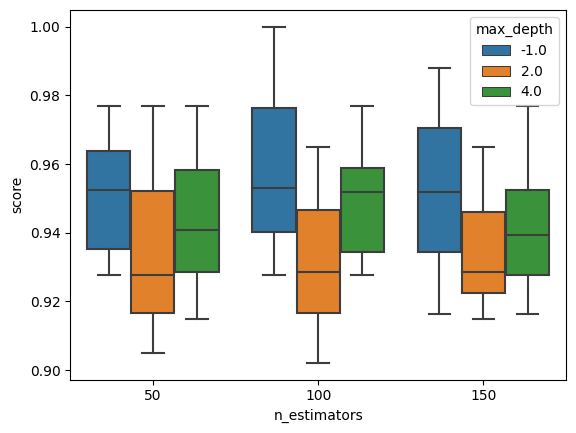

In [26]:
import seaborn as sns

sns.boxplot(x='n_estimators', y='score', hue='max_depth', data=df)

<Axes: xlabel='n_estimators', ylabel='score'>

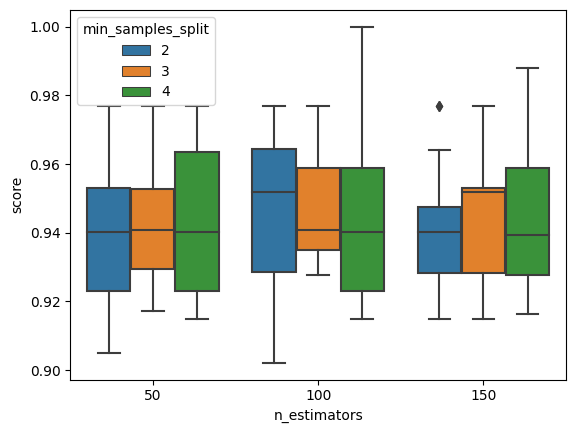

In [27]:
sns.boxplot(x='n_estimators', y='score', hue='min_samples_split', data=df)

Let's test the model we empirically found to be the best.

In [28]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=4)

rf.fit(X_train, y_train)

print("Test Set Score:", rf.score(X_test, y_test))

Test Set Score: 0.956140350877193


## Online Testing

In production systems, we also want to test models that are actually deployed and serving. This has the benefits of being able to (i) test the models on the actual environment we want them to operate on, (ii) test the models on real and recent data and (iii) use business metrics instead of ML metrics to evaluate their performance. The process of doing so is called A/B testing.

A/B testing, also known as controlled experimentation, is a technique used in online model testing to compare the performance of different versions of a machine learning model in a live or production environment. It involves deploying multiple model variants (A and B) simultaneously and measuring their performance on real-world data to determine which version performs better.




